In [130]:
# Imports

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score 
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
# Load input data and labels

dataset = datasets.load_breast_cancer()

x, y = dataset.data, dataset.target

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:
# Helper function to evaluate model performance
def evaluate(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='macro')}")
    print(f"Recall: {recall_score(y_true, y_pred, average='macro')}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='macro')}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}")

In [155]:
# Implement Logistic Regression using sklearn

regressor = LogisticRegression(max_iter=5000)
regressor.fit(X_train, Y_train)

# Predict
predictions = regressor.predict(X_test)

# Evaluate
evaluate(Y_test, predictions)

Accuracy: 0.956140350877193
Precision: 0.960472972972973
Recall: 0.9464461185718964
F1 Score: 0.9526381387619443
Confusion Matrix: 
[[39  4]
 [ 1 70]]


Iteration:0
Iteration:100
Iteration:200
Iteration:300
Iteration:400
Iteration:500
Iteration:600
Iteration:700
Iteration:800
Iteration:900
Accuracy: 0.956140350877193
Precision: 0.9516233766233766
Recall: 0.9556174254831313
F1 Score: 0.9535338713621913
Confusion Matrix: 
[[41  2]
 [ 3 68]]


Text(0.5, 1.0, 'Training Loss')

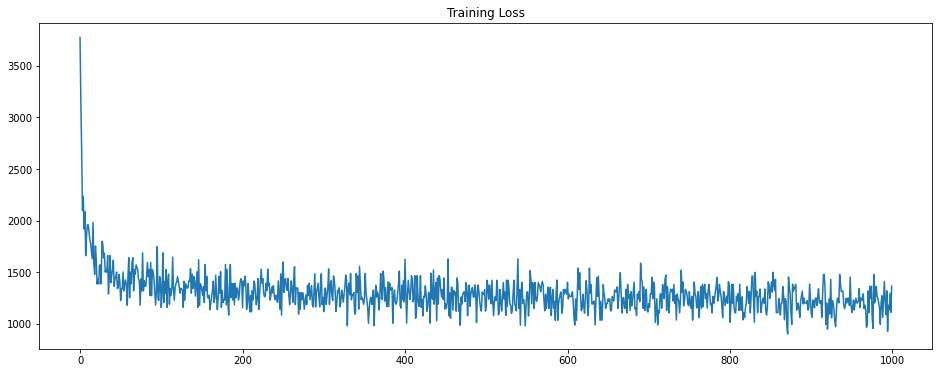

In [152]:
# Implementing Logistic Regressor class from scratch

class Logistic_regressor():

    def __init__(self, n_iter=5000, learning_rate=0.01, l2_reg = 1e-5):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.l2_reg = l2_reg
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, x):
        # return 1 / (1 + np.exp(-x))
        return expit(x)

    def binary_cross_entropy_loss(self, y_true, y_pred, weights, l2_reg):
        epsilon = 1e-10  
        bce_loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
        l2_term = l2_reg * np.sum(weights ** 2) 
        total_loss = bce_loss + l2_term
        return total_loss
    
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for iter in range(self.n_iter):
            if iter % 100 == 0:
                print(f'Iteration:{iter}')
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            training_loss = 0
            for idx in indices:
                x = X[idx]
                y = Y[idx]
                A = self.sigmoid(np.dot(x, self.weights) + self.bias)
                training_loss += self.binary_cross_entropy_loss(y, A, self.weights, self.l2_reg)
                dz = A - y
                dw = (np.dot(x.T, dz) + self.l2_reg * self.weights)
                db =  np.sum(dz) 
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            self.losses.append(training_loss)
    
    def predict(self, X):
        threshold = 0.5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        return np.asarray(y_predicted_cls)


my_regressor = Logistic_regressor(n_iter=1000, learning_rate=0.01, l2_reg=1e-7)
my_regressor.fit(X_train, Y_train)
my_predictions = my_regressor.predict(X_test)

# Evaluate
evaluate(Y_test, my_predictions)

plt.figure(figsize=(16,6))
plt.plot(my_regressor.losses)
plt.title('Training Loss')

Iteration:0
Iteration:100
Iteration:200
Iteration:300
Iteration:400
Iteration:500
Iteration:600
Iteration:700
Iteration:800
Iteration:900
Accuracy: 0.9333333333333333
Precision: 0.9326599326599326
Recall: 0.9326599326599326
F1 Score: 0.9326599326599326
Confusion Matrix: 
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


Text(0.5, 1.0, 'Training Loss')

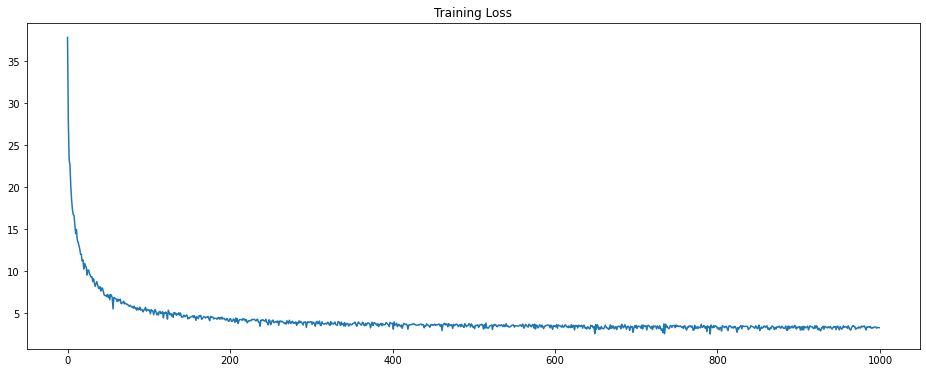

In [168]:

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

class Multi_Logistic_regressor():
    def __init__(self, n_iter=5000, learning_rate=0.01, l2_reg = 1e-5):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.l2_reg = l2_reg
        self.weights = None
        self.bias = None
        self.losses = []

    def softmax(self, x):
        max_val = np.max(x)
        x_exp = np.exp(x - max_val)
        sig = x_exp / np.sum(x_exp)
        return sig

    def categorical_cross_entropy_loss(self, y_true, y_pred, weights, l2_reg):
        epsilon = 1e-10  

        y_onehot = np.zeros_like(y_pred)
        y_onehot[y_true] = 1

        ce_loss = -np.sum(y_onehot * np.log(y_pred + epsilon)) / len(y_pred)

        l2_term = l2_reg * np.sum(weights ** 2)
        total_loss = ce_loss + l2_term

        return total_loss
    
    def grad_categorical_loss(self, y_true, y_pred):
        
        y_onehot = np.zeros_like(y_pred)
        y_onehot[y_true] = 1
    
        grad = (y_pred - y_onehot)
    
        return grad
    
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(Y))
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        for iter in range(self.n_iter):
            if iter % 100 == 0:
                print(f'Iteration:{iter}')
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            training_loss = 0
            for idx in indices:
                x = X[idx]
                y = Y[idx]
                A = self.softmax(np.dot(x, self.weights) + self.bias)
                training_loss += self.categorical_cross_entropy_loss(y, A, self.weights, self.l2_reg)
                dz  = self.grad_categorical_loss(y, A) 
                dw = (np.outer(x.T, dz) + self.l2_reg * self.weights)
                db =  np.sum(dz) 
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            self.losses.append(training_loss)
    
    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self.softmax(y_hat)
        y_predicted_cls = np.argmax(y_predicted, axis=1)
        return y_predicted_cls

# Load a multiclass dataset
# iris_dataset = datasets.load_iris()
iris_dataset = datasets.load_iris()
x_iris, y_iris = iris_dataset.data, iris_dataset.target
X_iris_train, X_iris_test, Y_iris_train, Y_iris_test = train_test_split(x_iris, y_iris, test_size=0.2, random_state=42)

# Train the model
my_multiclass_regressor = Multi_Logistic_regressor(n_iter=1000, learning_rate=0.01, l2_reg=1e-6)
my_multiclass_regressor.fit(X_iris_train, Y_iris_train)

# Make predictions
my_predictions = my_multiclass_regressor.predict(X_iris_test)

evaluate(Y_iris_test, my_predictions)

plt.figure(figsize=(16,6))
plt.plot(my_multiclass_regressor.losses)
plt.title('Training Loss')